In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [6]:
df = pd.read_csv('english_news_dataset.csv')

In [7]:
df. head()

,Headline,Content,News Categories,Date
0,Congress leader Baljinder Singh shot dead at h...,Congress leader Baljinder Singh was shot dead ...,['national'],19-09-2023
1,17-year-old girl preparing for NEET dies by su...,Another NEET aspirant died by suicide in Rajas...,['national'],19-09-2023
2,Hampers to welcome MPs in new Parliament tomor...,In order to mark the first-ever working day of...,['national'],19-09-2023
3,"Only 10% women lawmakers in RS, while only 14%...","Congress President Mallikarjun Kharge, while s...",['national'],19-09-2023
4,"Ganesh temple decorated with notes, coins wort...",The Sri Sathya Ganapathi Temple in Bengaluru a...,['national'],19-09-2023


In [8]:
df["News Categories"]

,News Categories
0,['national']
1,['national']
2,['national']
3,['national']
4,['national']
...,...
199701,"['science', 'Health___Fitness']"
199702,"['science', 'Health___Fitness']"
199703,['Health___Fitness']
199704,"['science', 'Health___Fitness']"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199706 entries, 0 to 199705
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Headline         199706 non-null  object
 1   Content          199706 non-null  object
 2   News Categories  199706 non-null  object
 3   Date             199706 non-null  object
dtypes: object(4)
memory usage: 6.1+ MB


In [10]:
df.isnull(). sum()

,0
Headline,0
Content,0
News Categories,0
Date,0


In [11]:
df . duplicated(). sum()

np.int64(35452)

In [12]:
df["Date"]. head()

,Date
0,19-09-2023
1,19-09-2023
2,19-09-2023
3,19-09-2023
4,19-09-2023


In [13]:
df.describe ()

,Headline,Content,News Categories,Date
count,199706,199706,199706,199706
unique,33242,33229,534,92
top,"Delhi Bans Ola, Uber From Other States Due To ...",Delhi government has restricted the entry of a...,['entertainment'],2023-10-13
freq,157,157,11021,4171


In [14]:
df.shape

(199706, 4)

In [15]:
df.dtypes

,0
Headline,object
Content,object
News Categories,object
Date,object


In [16]:
# Step 3: Extract first category (assumes string format)
df['clean_category'] = df['News Categories'].apply(lambda x: eval(x)[0] if isinstance(x, str) else x)


In [18]:
# Step 5: Clean text
df['Headline'] = df['Headline'].str.lower().str.replace(r"[^a-zA-Z\s]", "", regex=True)


In [19]:
# Step 5: Clean text
df['Headline'] = df['Headline'].str.lower().str.replace(r"[^a-zA-Z\s]", "", regex=True)


In [20]:
df.head()

,Headline,Content,News Categories,Date,clean_category
0,congress leader baljinder singh shot dead at h...,Congress leader Baljinder Singh was shot dead ...,['national'],19-09-2023,national
1,yearold girl preparing for neet dies by suicid...,Another NEET aspirant died by suicide in Rajas...,['national'],19-09-2023,national
2,hampers to welcome mps in new parliament tomor...,In order to mark the first-ever working day of...,['national'],19-09-2023,national
3,only women lawmakers in rs while only in ls ...,"Congress President Mallikarjun Kharge, while s...",['national'],19-09-2023,national
4,ganesh temple decorated with notes coins worth...,The Sri Sathya Ganapathi Temple in Bengaluru a...,['national'],19-09-2023,national


EDA


/tmp/ipython-input-40-758453592.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='clean_category', order=df['clean_category'].value_counts().index, palette='viridis')


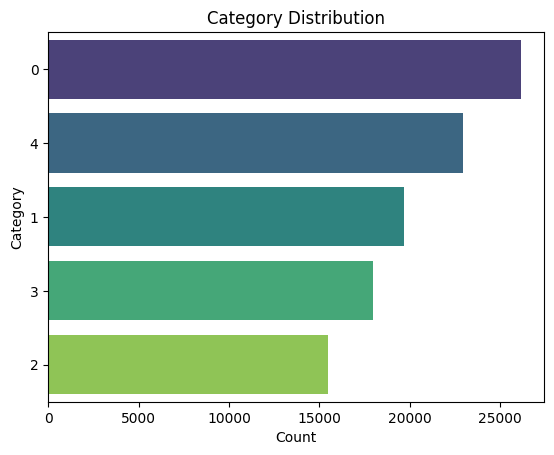

In [40]:
# plotting plt.figure(figsize=(10,6))
sns.countplot(data=df, y='clean_category', order=df['clean_category'].value_counts().index, palette='viridis')
plt.title("Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

In [48]:
for category in top_5:
    text = " ".join(df[df['clean_category'] == category]['Headline'].dropna())

    if text.strip():  # Check if there's any text
        plt.figure(figsize=(8,5))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"WordCloud for {category}", fontsize=16)
        plt.tight_layout(pad=0)
        plt.show()
    else:
        print(f"⚠️ No data available to generate word cloud for: {category}")


⚠️ No data available to generate word cloud for: business
⚠️ No data available to generate word cloud for: world
⚠️ No data available to generate word cloud for: entertainment
⚠️ No data available to generate word cloud for: politics
⚠️ No data available to generate word cloud for: national


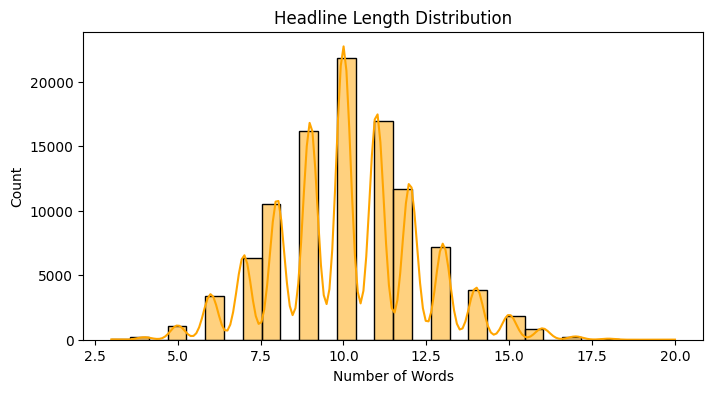

In [41]:
df['headline_length'] = df['Headline'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,4))
sns.histplot(df['headline_length'], bins=30, kde=True, color='orange')
plt.title("Headline Length Distribution")
plt.xlabel("Number of Words")
plt.show()

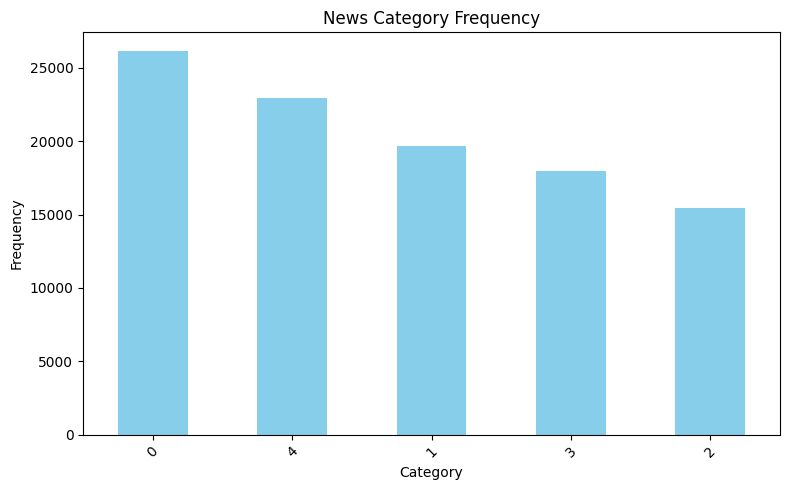

In [49]:
plt.figure(figsize=(8,5))
df['clean_category'].value_counts().plot(kind='bar', color='skyblue')
plt.title("News Category Frequency")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:

# Step 6: Label Encode target
le = LabelEncoder()
df['clean_category'] =  le.fit_transform(df['clean_category'])

In [22]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
for category, label in label_mapping.items():
    print(f"{category} --> {label}")

business --> 0
entertainment --> 1
national --> 2
politics --> 3
world --> 4


In [23]:
X = df['Headline']
y = df['clean_category']

In [24]:
# Step 8: Train-test split
x_train, x_test, y_train, y_test = train_test_split(df['Headline'], df['clean_category'], test_size=0.2, random_state=42)

In [25]:
# Step 9 (part 1): TF-IDF Vectorization
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features as needed

# Fit and transform the training data
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Transform the testing data
x_test_tfidf = tfidf_vectorizer.transform(x_test)

print("TF-IDF vectorization complete.")
print("Shape of x_train_tfidf:", x_train_tfidf.shape)
print("Shape of x_test_tfidf:", x_test_tfidf.shape)

TF-IDF vectorization complete.
Shape of x_train_tfidf: (81767, 5000)
Shape of x_test_tfidf: (20442, 5000)


In [26]:
# Step 9: Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [27]:
# Step 10: Evaluate
y_pred = log_model.predict(x_test_tfidf)
print("\nTF-IDF + Logistic Regression Results:\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


TF-IDF + Logistic Regression Results:

Accuracy: 0.9398297622541826
               precision    recall  f1-score   support

     business       0.96      0.97      0.96      5135
entertainment       0.97      0.96      0.96      3986
     national       0.91      0.86      0.89      3146
     politics       0.91      0.93      0.92      3622
        world       0.94      0.94      0.94      4553

     accuracy                           0.94     20442
    macro avg       0.94      0.93      0.94     20442
 weighted avg       0.94      0.94      0.94     20442



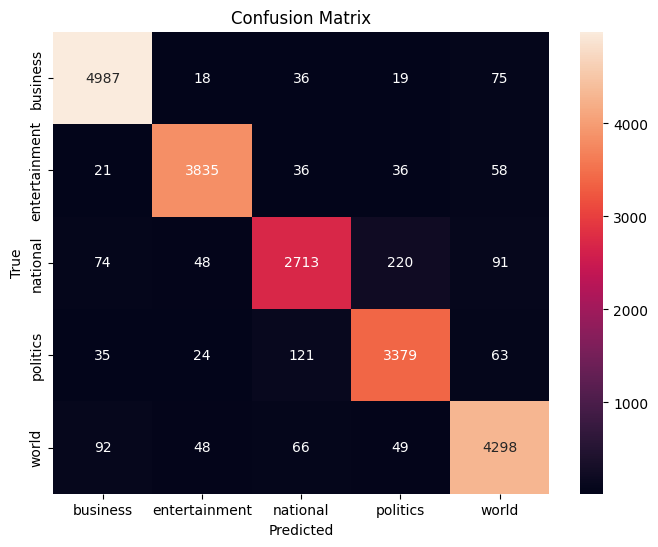

In [28]:
# Step 11: Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [29]:
# Step 12: Prepare text
texts = df['Headline'].values
targets = df['clean_category'].values
num_classes = len(np.unique(targets))

In [30]:
# Step 13: Tokenize and pad
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X_pad = pad_sequences(sequences,maxlen=50)

In [31]:
# Step 14: Train-test split
X_train_pad, X_test_pad, y_train_pad, y_test_pad = train_test_split(X_pad, targets, test_size=0.2, stratify=targets, random_state=42)


In [32]:
# Step 5: One-hot encode target
y_train_oh = to_categorical(y_train_pad, num_classes=num_classes)
y_test_oh = to_categorical(y_test_pad, num_classes=num_classes)


In [33]:
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2025-07-16 02:23:59--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-07-16 02:23:59--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-07-16 02:24:00--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [34]:
!unzip glove.6B.zip


Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [35]:
embedding_index = {}
with open("glove.6B.100d.txt", encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

embedding_dim = 100
embedding_matrix = np.zeros((10000, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < 10000:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


In [36]:
# Step 18: Build LSTM Model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=100, weights=[embedding_matrix], trainable=False))
model.add(LSTM(128))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [37]:
# Step 19: Train model
model.fit(X_train_pad, y_train_oh, validation_data=(X_test_pad, y_test_oh), epochs=5, batch_size=64)


Epoch 1/5
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 146s 112ms/step - accuracy: 0.7420 - loss: 0.7146 - val_accuracy: 0.8849 - val_loss: 0.3548
Epoch 2/5
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 181s 141ms/step - accuracy: 0.9010 - loss: 0.3024 - val_accuracy: 0.9278 - val_loss: 0.2256
Epoch 3/5
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 172s 118ms/step - accuracy: 0.9467 - loss: 0.1697 - val_accuracy: 0.9522 - val_loss: 0.1595
Epoch 4/5
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 155s 121ms/step - accuracy: 0.9709 - loss: 0.0995 - val_accuracy: 0.9664 - val_loss: 0.1227
Epoch 5/5
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 203s 122ms/step - accuracy: 0.9827 - loss: 0.0620 - val_accuracy: 0.9723 - val_loss: 0.1024


In [38]:
# Step 10: Evaluate
loss, acc = model.evaluate(X_test_pad, y_test_oh)
print("\nLSTM Model Accuracy:", acc)


639/639 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.9729 - loss: 0.1007

LSTM Model Accuracy: 0.9723119139671326
